In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [16]:
df = pd.read_csv('../datasets/RIASEC_Dataset_clustered_v2.csv')
X = df.drop(columns=['major_cluster'])
y = df['major_cluster']

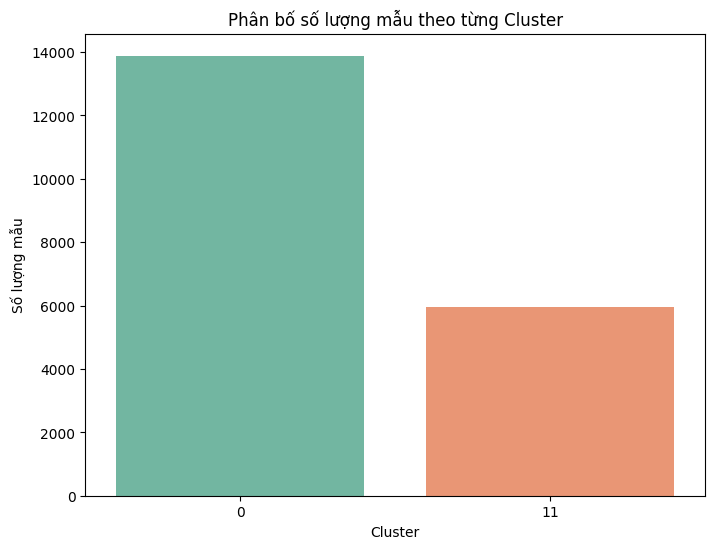

📈 Số lượng mẫu mỗi cluster:
major_cluster
0     13885
11     5950
Name: count, dtype: int64


In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='major_cluster', hue='major_cluster', data=df, palette='Set2', legend=False)
plt.title("Phân bố số lượng mẫu theo từng Cluster")
plt.xlabel("Cluster")
plt.ylabel("Số lượng mẫu")
plt.show()

# --- In số lượng mẫu từng cluster ---
print("📈 Số lượng mẫu mỗi cluster:")
print(df['major_cluster'].value_counts().sort_index())

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)

In [23]:
print("\nSố lượng mẫu mỗi cluster SAU khi SMOTE:")
print(pd.Series(y_train_resampled).value_counts().sort_index())



Số lượng mẫu mỗi cluster SAU khi SMOTE:
major_cluster
0     11108
11    11108
Name: count, dtype: int64


In [24]:
model = GaussianNB()

In [25]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    model, X_train_resampled, y_train_resampled,
    cv=kfold, scoring='f1_macro'
)
print(f"F1_macro (cross-val, đã SMOTE): {cv_scores.mean():.4f}")

F1_macro (cross-val, đã SMOTE): 0.8041


In [26]:
model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [27]:
y_pred = model.predict(X_test_scaled)

In [28]:
test_f1 = f1_score(y_test, y_pred, average='macro')
print(f"✅ F1_macro trên tập test: {test_f1:.4f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

✅ F1_macro trên tập test: 0.7719

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      2777
          11       0.62      0.80      0.70      1190

    accuracy                           0.79      3967
   macro avg       0.76      0.80      0.77      3967
weighted avg       0.82      0.79      0.80      3967



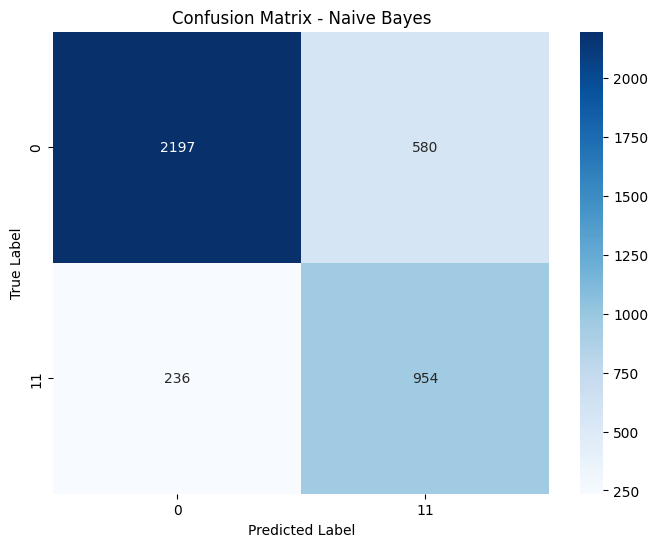

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [30]:
joblib.dump(scaler, '../models/scaler_nb_v2.joblib')
joblib.dump(model, '../models/naive_bayes_v2.joblib')
print("💾 Đã lưu scaler và mô hình vào thư mục models/")

💾 Đã lưu scaler và mô hình vào thư mục models/
